#### Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Read the file

In [2]:
Netflix = pd.read_csv('netflix1.csv')

#### check the first five rows of dataset

In [3]:
Netflix.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [4]:
Netflix.rename(columns={'listed_in':'Categories'},inplace=True)

In [5]:
Netflix.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,Categories
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


Lets check how many number of rows and columns this dataset has

In [6]:
Netflix.shape

(8790, 10)

In [7]:
Netflix.dtypes

show_id         object
type            object
title           object
director        object
country         object
date_added      object
release_year     int64
rating          object
duration        object
Categories      object
dtype: object

In [8]:
Netflix.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 8790 entries, 0 to 8789

Data columns (total 10 columns):

 #   Column        Non-Null Count  Dtype 

---  ------        --------------  ----- 

 0   show_id       8790 non-null   object

 1   type          8790 non-null   object

 2   title         8790 non-null   object

 3   director      8790 non-null   object

 4   country       8790 non-null   object

 5   date_added    8790 non-null   object

 6   release_year  8790 non-null   int64 

 7   rating        8790 non-null   object

 8   duration      8790 non-null   object

 9   Categories    8790 non-null   object

dtypes: int64(1), object(9)

memory usage: 686.8+ KB


In [11]:
Netflix.describe()

,release_year
count,8790.000000
mean,2014.183163
std,8.825466
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [14]:
Netflix.isnull().sum()

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
Categories      0
dtype: int64

least year is 1925 and maximum year is 2021

Let's check individual variabel

#### TYPE

In [12]:
Netflix.type.value_counts()

Movie      6126
TV Show    2664
Name: type, dtype: int64

#### TITLE

In [15]:
Netflix.title.value_counts()

9-Feb                   2
15-Aug                  2
22-Jul                  2
Dick Johnson Is Dead    1
SGT. Will Gardner       1
                       ..
Mercy Black             1
The Trap                1
Pinky Memsaab           1
Love O2O                1
YOM                     1
Name: title, Length: 8787, dtype: int64

In [16]:
Netflix.title.duplicated().value_counts()

False    8787
True        3
Name: title, dtype: int64

In [17]:
Netflix.title.nunique()

8787

Total number of rows are 8790 and 8787 is the no. of the unique titles means we have three such titles which are duplicated or null

In [19]:
Netflix=Netflix.drop_duplicates(subset='title')

In [20]:
Netflix.title.duplicated().value_counts()

False    8787
Name: title, dtype: int64

DIRECTOR

In [21]:
Netflix.director.value_counts()

Not Given                         2587
Rajiv Chilaka                       20
Raúl Campos, Jan Suter              18
Alastair Fothergill                 18
Marcus Raboy                        16
                                  ... 
Parthiban                            1
Scott McAboy                         1
Raymie Muzquiz, Stu Livingston       1
Joe Menendez                         1
Mozez Singh                          1
Name: director, Length: 4528, dtype: int64

In [23]:
Netflix_not_given_directors=Netflix[Netflix.director=='Not Given']

In [24]:
Netflix_not_given_directors.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,Categories
12,s852,Movie,99 Songs (Tamil),Not Given,Pakistan,5/21/2021,2021,TV-14,131 min,"Dramas, International Movies, Music & Musicals"
17,s4,TV Show,Jailbirds New Orleans,Not Given,Pakistan,9/24/2021,2021,TV-MA,1 Season,"Docuseries, Reality TV"
18,s15,TV Show,Crime Stories: India Detectives,Not Given,Pakistan,9/22/2021,2021,TV-MA,1 Season,"British TV Shows, Crime TV Shows, Docuseries"
33,s20,TV Show,Jaguar,Not Given,Pakistan,9/22/2021,2021,TV-MA,1 Season,"International TV Shows, Spanish-Language TV Sh..."
34,s32,TV Show,Chicago Party Aunt,Not Given,Pakistan,9/17/2021,2021,TV-MA,1 Season,TV Comedies


Not given needs to get converted to nan as it symbolises null value

In [25]:
Netflix.director.replace('Not Given',np.nan,inplace=True)

C:\Users\APARNA T. SHAHARE\anaconda3\lib\site-packages\pandas\core\generic.py:6619: SettingWithCopyWarning: 

A value is trying to be set on a copy of a slice from a DataFrame



See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  return self._update_inplace(result)


In [26]:
Netflix.director.isnull().sum()

2587

Let's check how much percentage of the data these null values hold, if it contains less percentage then it would be easy for us to simply drop those rows

In [27]:
round(Netflix.director.isnull().sum()/Netflix.shape[0]*100,2)

29.44

COUNTRY

In [28]:
Netflix.country.value_counts()

United States     3240
India             1056
United Kingdom     638
Pakistan           420
Not Given          287
                  ... 
Iran                 1
West Germany         1
Greece               1
Zimbabwe             1
Soviet Union         1
Name: country, Length: 86, dtype: int64

In [29]:
Netflix_not_given_country=Netflix[Netflix.country=='Not Given']

In [30]:
Netflix_not_given_country

,show_id,type,title,director,country,date_added,release_year,rating,duration,Categories
23,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha",Not Given,9/24/2021,2021,PG,91 min,Children & Family Movies
24,s12,TV Show,Bangkok Breaking,Kongkiat Komesiri,Not Given,9/23/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
25,s17,Movie,Europe's Most Dangerous Man: Otto Skorzeny in ...,"Pedro de Echave García, Pablo Azorín Williams",Not Given,9/22/2021,2020,TV-MA,67 min,"Documentaries, International Movies"
26,s7930,Movie,Samudri Lootere,Anirban Majumder,Not Given,6/18/2019,2018,TV-Y,65 min,Children & Family Movies
52,s19,Movie,Intrusion,Adam Salky,Not Given,9/22/2021,2021,TV-14,94 min,Thrillers
...,...,...,...,...,...,...,...,...,...,...
6005,s8161,Movie,Teenage Mutant Ninja Turtles: The Movie,Steve Barron,Not Given,1/1/2020,1990,PG,94 min,"Action & Adventure, Comedies"
6257,s8451,Movie,The Perfect Day,Jean-Pierre Devillers,Not Given,9/1/2018,2018,TV-14,93 min,"Documentaries, International Movies, Sports Mo..."
6366,s8603,Movie,Tom and Jerry: The Magic Ring,Phil Roman,Not Given,12/15/2019,2001,TV-Y7,60 min,"Children & Family Movies, Comedies"
6468,s8719,Movie,Westside vs. the World,Michael Fahey,Not Given,8/9/2019,2019,TV-MA,96 min,"Documentaries, Sports Movies"


In [31]:
Netflix.country.nunique()

86

DATE ADDED

In [33]:
Netflix['date_added']=pd.to_datetime(Netflix['date_added'])

C:\Users\APARNA~1.SHA\AppData\Local\Temp/ipykernel_20840/1668471282.py:1: SettingWithCopyWarning: 

A value is trying to be set on a copy of a slice from a DataFrame.

Try using .loc[row_indexer,col_indexer] = value instead



See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  Netflix['date_added']=pd.to_datetime(Netflix['date_added'])


In [34]:
Netflix.dtypes

show_id                 object
type                    object
title                   object
director                object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
Categories              object
dtype: object

In [35]:
Netflix.date_added.head()

0   2021-09-25
1   2021-09-24
2   2021-09-24
3   2021-09-22
4   2021-09-24
Name: date_added, dtype: datetime64[ns]

RATING

In [36]:
Netflix.rating.unique()

array(['PG-13', 'TV-MA', 'TV-PG', 'TV-14', 'TV-Y7', 'TV-Y', 'PG', 'TV-G',
       'R', 'G', 'NC-17', 'NR', 'TV-Y7-FV', 'UR'], dtype=object)

VALUE COUNTS

In [37]:
Netflix.duration.value_counts()

1 Season      1790
2 Seasons      421
3 Seasons      198
90 min         152
97 min         146
              ... 
5 min            1
16 min           1
186 min          1
193 min          1
11 Seasons       1
Name: duration, Length: 220, dtype: int64

In [38]:
Netflix.duration.unique()

array(['90 min', '1 Season', '91 min', '125 min', '9 Seasons', '104 min',
       '87 min', '127 min', '76 min', '71 min', '131 min', '39 min',
       '36 min', '34 min', '35 min', '46 min', '67 min', '65 min',
       '61 min', '166 min', '103 min', '97 min', '106 min', '2 Seasons',
       '4 Seasons', '147 min', '94 min', '161 min', '111 min', '110 min',
       '105 min', '96 min', '124 min', '116 min', '98 min', '115 min',
       '122 min', '55 min', '99 min', '88 min', '100 min', '6 Seasons',
       '3 Seasons', '23 min', '102 min', '93 min', '95 min', '85 min',
       '83 min', '182 min', '5 Seasons', '92 min', '84 min', '48 min',
       '145 min', '119 min', '80 min', '128 min', '143 min', '273 min',
       '117 min', '114 min', '118 min', '108 min', '37 min', '121 min',
       '63 min', '142 min', '113 min', '154 min', '120 min', '82 min',
       '109 min', '101 min', '86 min', '77 min', '229 min', '15 min',
       '89 min', '156 min', '112 min', '107 min', '129 min', '44 min',
  

CATEGORIES

In [39]:
Netflix.Categories.value_counts()

Dramas, International Movies                                362
Documentaries                                               359
Stand-Up Comedy                                             334
Comedies, Dramas, International Movies                      274
Dramas, Independent Movies, International Movies            252
                                                           ... 
Anime Features                                                1
Action & Adventure, Horror Movies, Independent Movies         1
Action & Adventure, Classic Movies, International Movies      1
Cult Movies, Independent Movies, Thrillers                    1
Classic & Cult TV, Crime TV Shows, TV Dramas                  1
Name: Categories, Length: 513, dtype: int64

Let's visualize the data and do analysis

<AxesSubplot:xlabel='type', ylabel='count'>

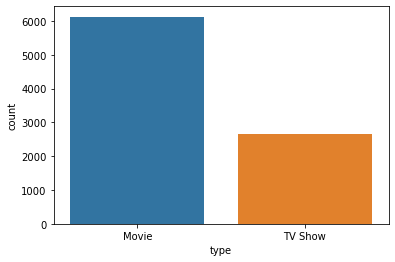

In [40]:
sns.countplot(data=Netflix,x='type')

In [42]:
top_10_countries=Netflix.country.value_counts(ascending=False).drop('Not Given').head(10)

In [43]:
top_10_countries

United States     3240
India             1056
United Kingdom     638
Pakistan           420
Canada             271
Japan              259
South Korea        214
France             213
Spain              182
Mexico             138
Name: country, dtype: int64

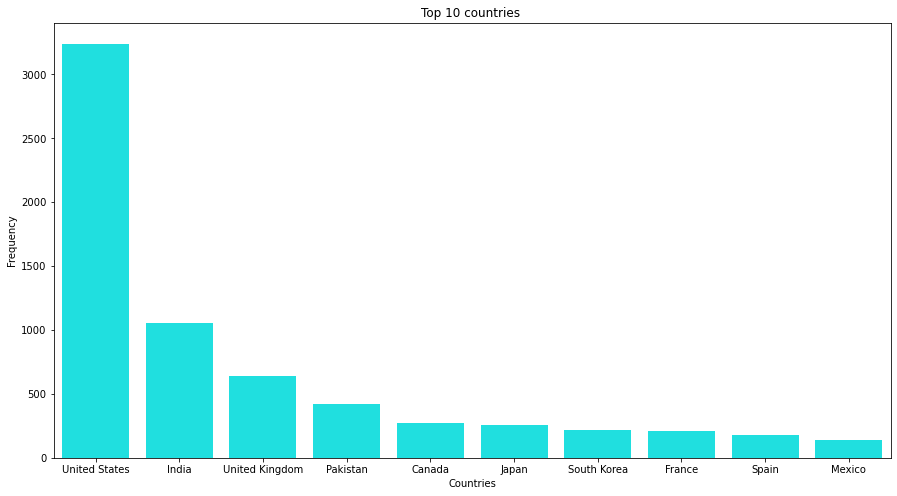

In [44]:
plt.figure(figsize=(15,8))
sns.barplot(x=top_10_countries.index, y=top_10_countries.values,color='cyan')
plt.xlabel('Countries')
plt.ylabel('Frequency')
plt.title('Top 10 countries ')
plt.show()

United States ranks no.1 in production of series and movies followed by India and UK 

It is not clear till now which category is mostly produced .

In [45]:
top_10_years = Netflix.release_year.value_counts(ascending=False).head(20)

In [48]:
top_10_directors= Netflix.director.value_counts(ascending=False).head(10)

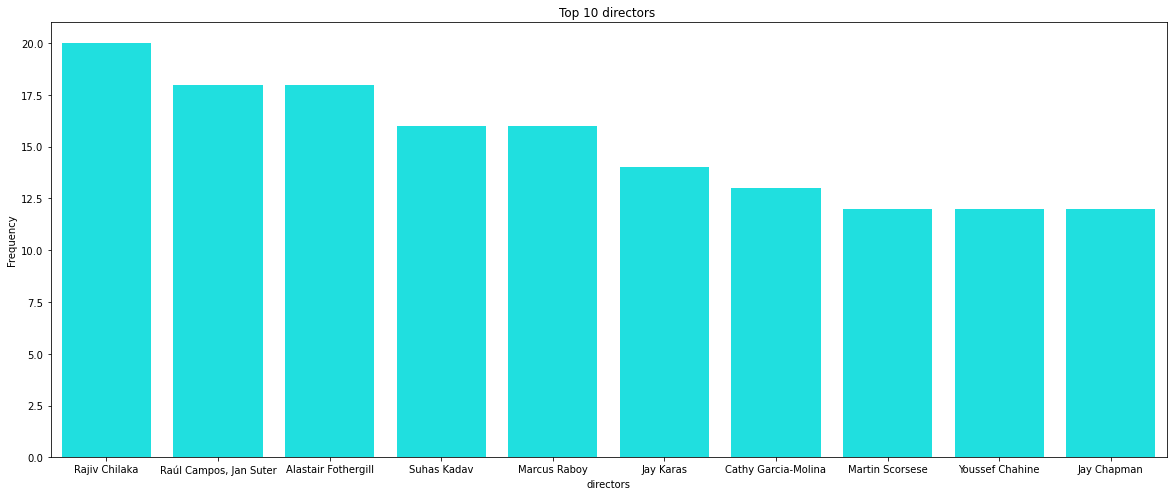

In [49]:
plt.figure(figsize=(20,8))
sns.barplot(x=top_10_directors.index, y=top_10_directors.values,color='cyan')
plt.xlabel('directors')
plt.ylabel('Frequency')
plt.title('Top 10 directors ')
plt.show()

The director who has directed max number of series and movies is found to be Rajiv Chilakha .

C:\Users\APARNA T. SHAHARE\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

  warnings.warn(


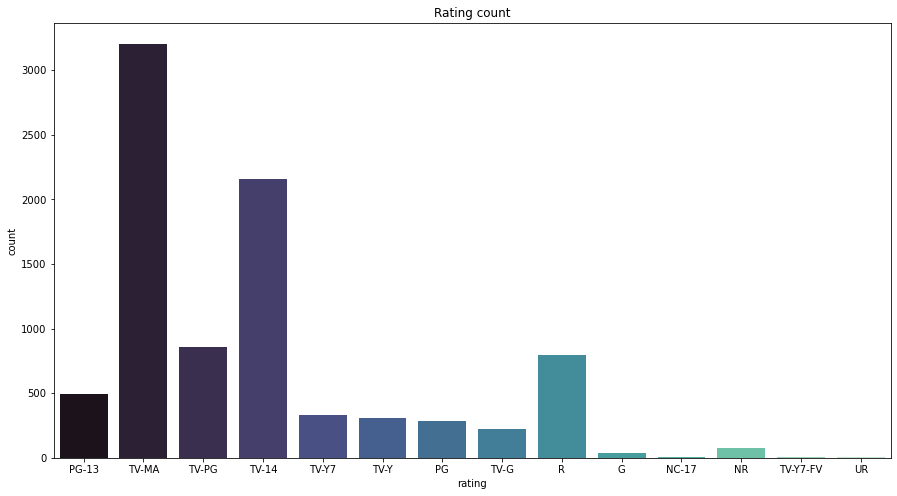

In [50]:
plt.figure(figsize=(15,8))
sns.countplot(Netflix['rating'],palette='mako')
plt.title('Rating count')
plt.show()

most of the shows has got the ratings of TV-MA, TV-14 and R which tells us that the platform is not suitable for kids.

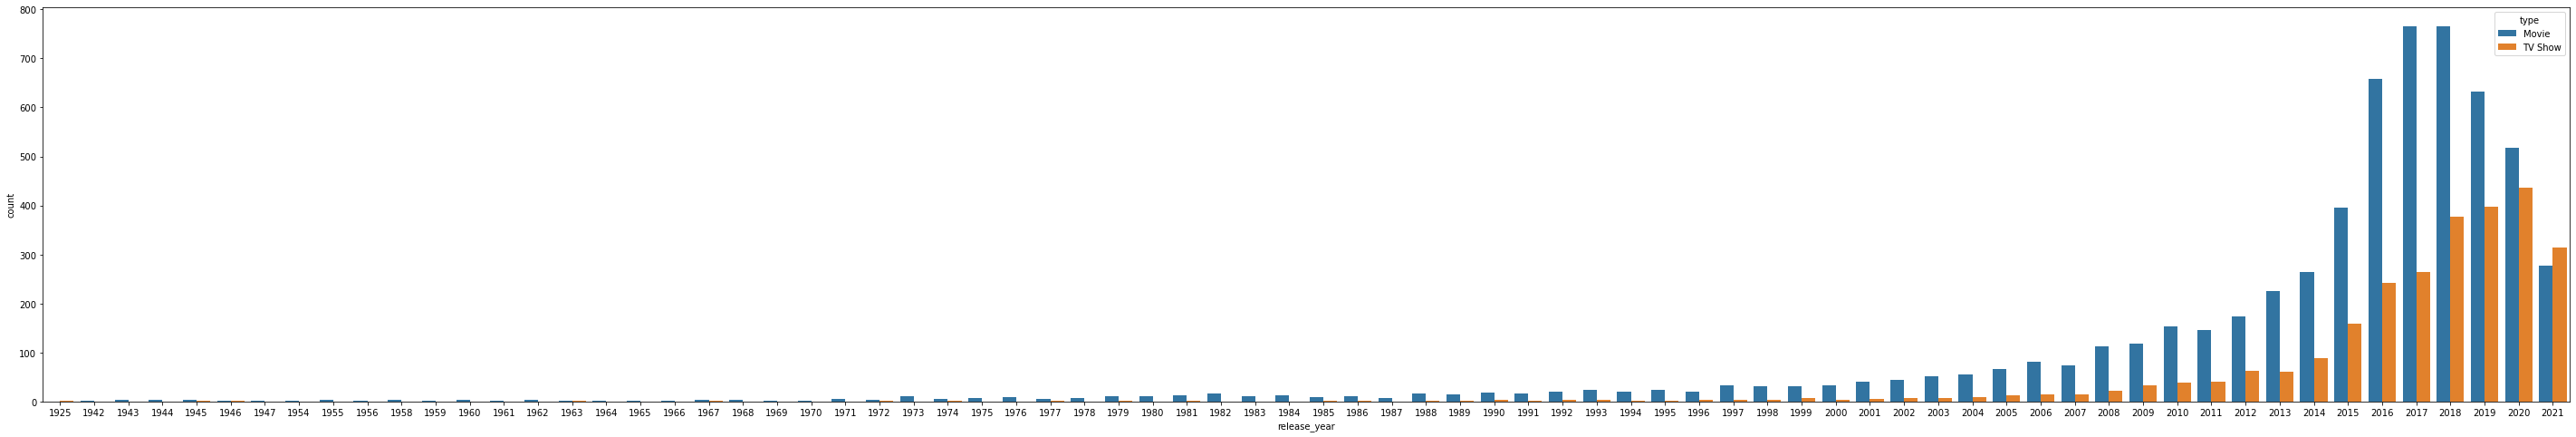

In [51]:
plt.figure(figsize=(50,8))
sns.countplot(data=Netflix,x='release_year',hue='type')
plt.show()

most of the TV-Shows has been increased in production till the year 2020 but has shown some drop after that whereas,
movies has shown increased in production 2018  which has shown sudden drop after 2018

<AxesSubplot:xlabel='rating', ylabel='count'>

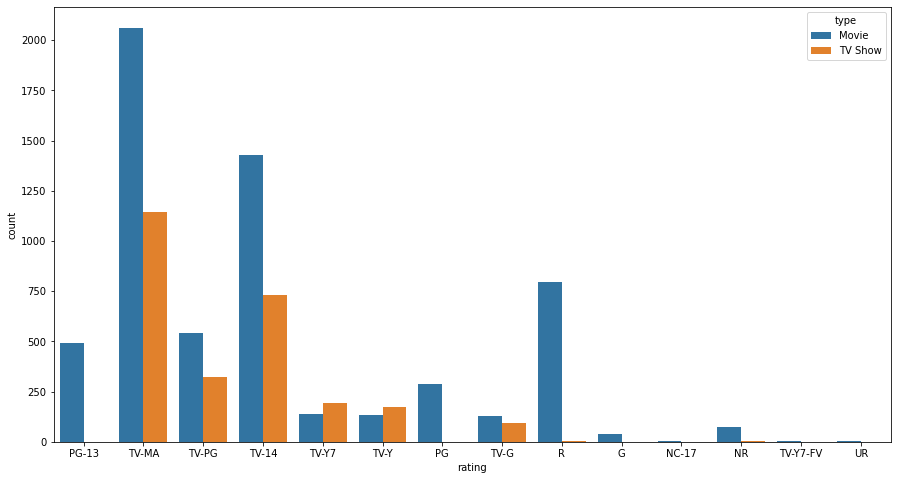

In [52]:
plt.figure(figsize=(15,8))
sns.countplot(data=Netflix,x='rating',hue='type')

In [53]:
top_10_categories = Netflix.Categories.value_counts(ascending=False).head(10)

In [54]:
top_10_categories

Dramas, International Movies                        362
Documentaries                                       359
Stand-Up Comedy                                     334
Comedies, Dramas, International Movies              274
Dramas, Independent Movies, International Movies    252
Kids' TV                                            219
Children & Family Movies                            215
Children & Family Movies, Comedies                  201
Documentaries, International Movies                 186
Dramas, International Movies, Romantic Movies       180
Name: Categories, dtype: int64

<AxesSubplot:>

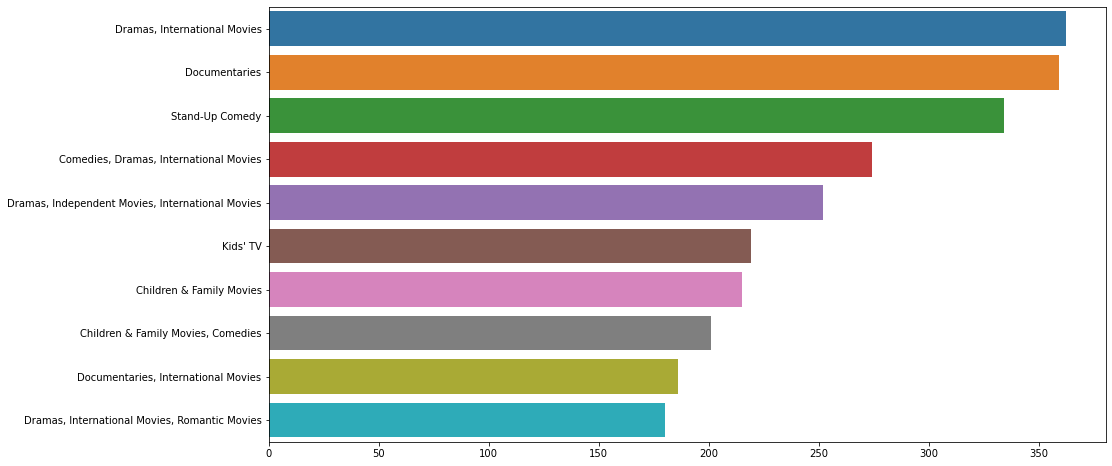

In [55]:
plt.figure(figsize=(15,8))
sns.barplot(x=top_10_categories.values,y=top_10_categories.index)

top three categories which has been produced in previous years are 
Dramas,International movies
followed by Documentaries and Stand up comedy and many more..

<AxesSubplot:ylabel='release_year'>

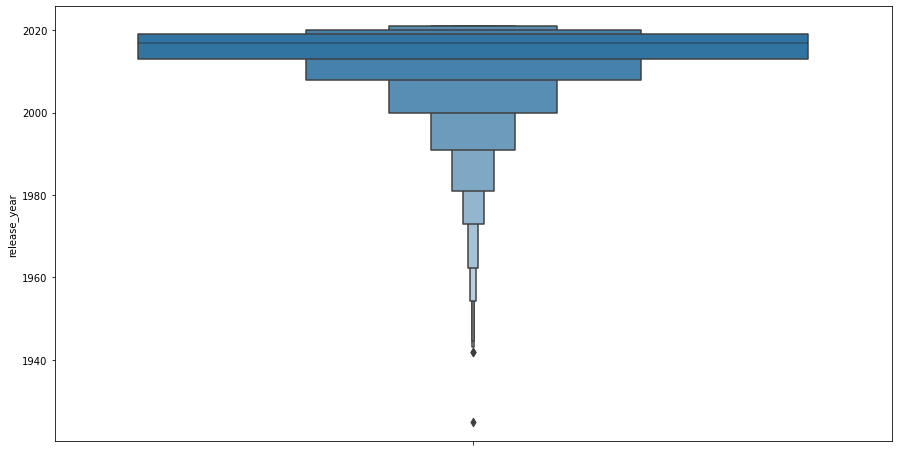

In [56]:
plt.figure(figsize=(15,8))
sns.boxenplot(y=Netflix['release_year'])

The above figure tells us about the outliers that are present in our dataset

<AxesSubplot:>

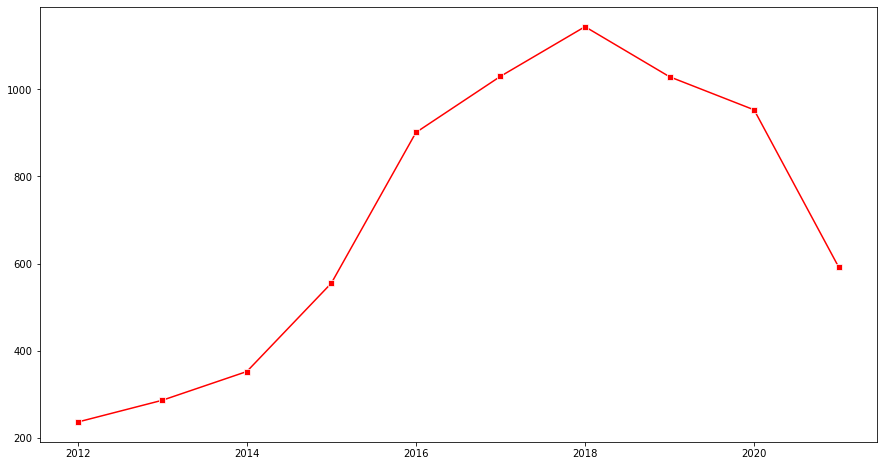

In [57]:
plt.figure(figsize=(15,8))
sns.lineplot(x=Netflix.release_year.value_counts(ascending=False).head(10).index,y=Netflix.release_year.value_counts(ascending=False).head(10).values,color='red',marker="s")


## Analysis report

1) Among the countries United states stands on number one position followed by India and UK.These countries are known for producing many more series and movies as compared to other countries.

2) Since the year 2011 movies and series has increased rapidly in number but till 2018 after which a fall can be seen till the year 2021

3) The director based on this data who has directed more number of movies and series is Rajiv Chilakha